## Notebook to demonstrate the making of an RGB image

description here

In [1]:
# use the entire screen width for the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


/var/folders/16/gpzts38j5p5dxjw1cl7tm2b00000gp/T/ipykernel_26761/3741155667.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# imports
import os
import sys
import glob
import numpy as np
#
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings('ignore')
#
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
#
import reproject as rpj

# add the code folder to the sys path
sys.path.append('../code')
from reproject_combine import reproject, make_rgb


In [3]:
# make interactive plots
%matplotlib notebook

In [4]:
# open target image
directory = '/Volumes/500GB/EROs/Carina/download/Carina_level3/' # set your own dir here
files = glob.glob(directory + '/*i2d.fits')

print('Found:')
for f in files:
    print(f)


Found:
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f090w_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f187n_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f200w_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f335m_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f444w_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o002_t017_miri_f1130w_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o002_t017_miri_f1280w_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o002_t017_miri_f1800w_i2d.fits
/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o002_t017_miri_f770w_i2d.fits


In [5]:
# select rgb files, can be lists if more than one needs to be combined in a given channel
r = ['/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits']
g = ['/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f335m_i2d.fits']
b = ['/Volumes/500GB/EROs/Carina/download/Carina_level3/jw02731-o001_t017_nircam_clear-f187n_i2d.fits']

# get data and science headers, reroject onto R reference
with fits.open(r[0]) as hdu:
    tar_sci_data = hdu['SCI'].data
    tar_sci_header = hdu['SCI'].header

target_wcs = WCS(tar_sci_header) # get target WCS info

#reproject each channel
repro_r = reproject(r, target_wcs, tar_sci_data) # get reprojected image arrays
repro_g = reproject(g, target_wcs, tar_sci_data) # get reprojected image arrays
repro_b = reproject(b, target_wcs, tar_sci_data) # get reprojected image arrays


<IPython.core.display.Javascript object>


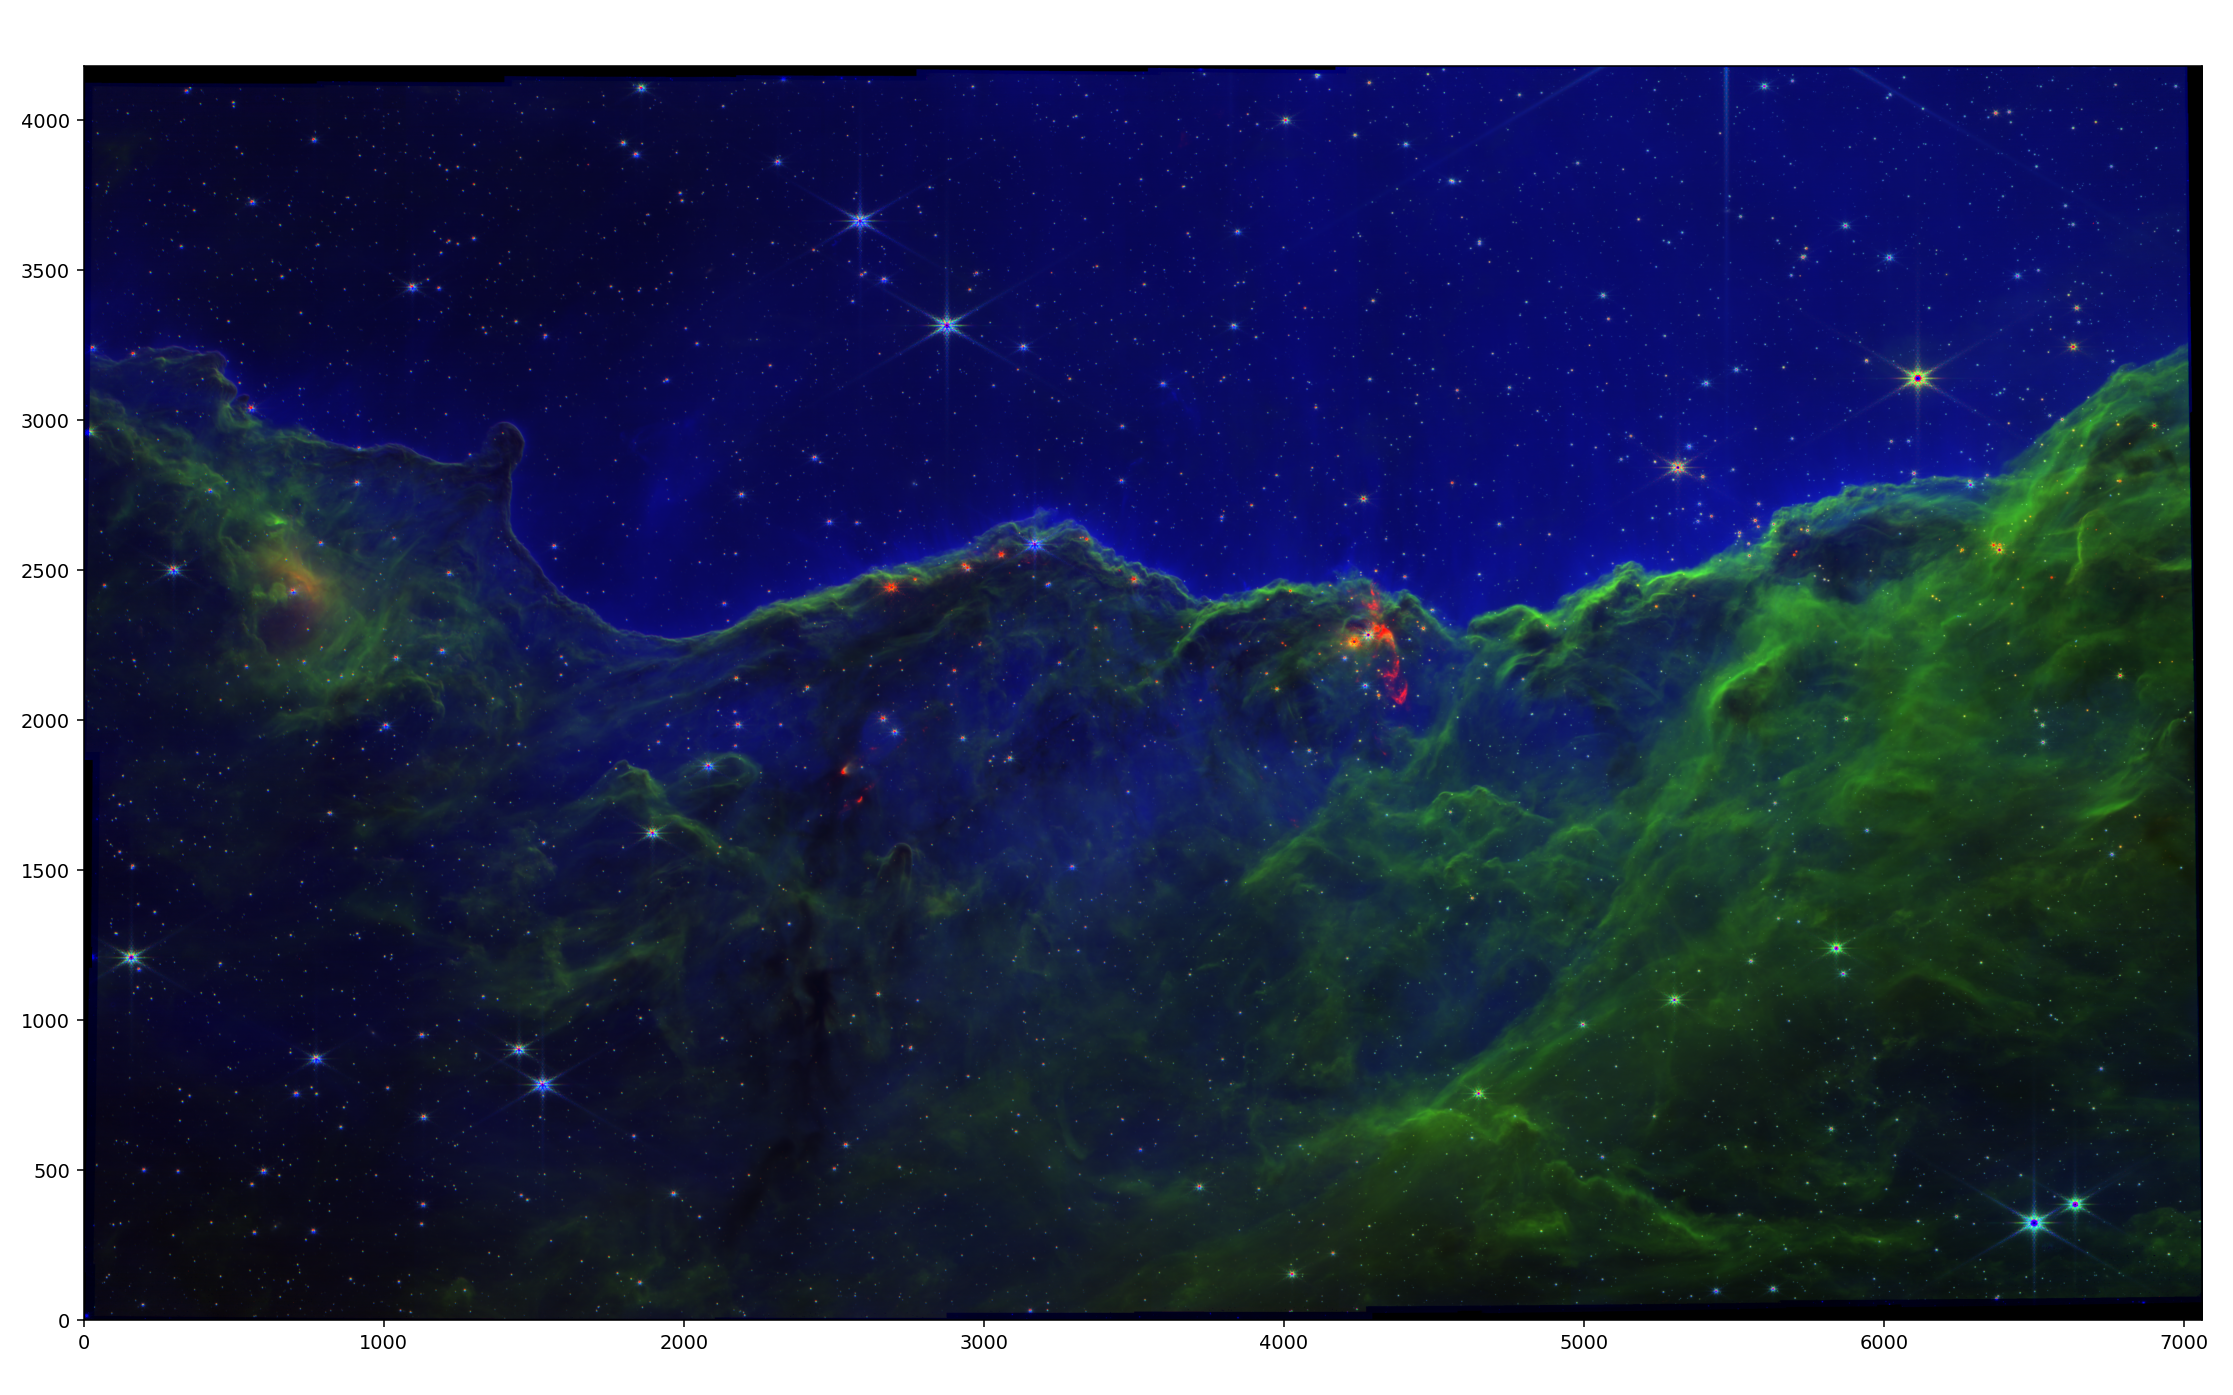

In [6]:
# make the lupton RGB and plot
list_images = [repro_b[0], repro_g[0], repro_r[0]]
rgb_img = make_rgb(list_images, stretch=50, Q=4, minimum=0, custom_stack=None)

fig, axs = plt.subplots(1, 1, figsize=(16, 10))
axs.imshow(rgb_img, origin='lower')
plt.tight_layout()
plt.show()
